# *1.OCR using Pytesseract*

In [1]:
import numpy as np 
import pandas as pd 

import os

In [2]:
!pip3 install datasets
!pip3 uninstall fsspec --yes

     |████████████████████████████████| 311 kB 596 kB/s            
     |████████████████████████████████| 212 kB 8.7 MB/s            
Found existing installation: fsspec 2022.2.0
Uninstalling fsspec-2022.2.0:
  Successfully uninstalled fsspec-2022.2.0


In [3]:
! pip install transformers datasets
! sudo apt install tesseract-ocr
! pip install pytesseract

import numpy as np 
import pandas as pd

import requests, zipfile, io

from sklearn.utils import shuffle

from datasets import Dataset
import os

     |████████████████████████████████| 134 kB 600 kB/s            
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
gcsfs 2021.11.1 requires fsspec==2021.11.1, but you have fsspec 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2022.2.0 which is incompatible.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 58 not upgraded.




 /kaggle/input/the-rvlcdip-dataset-test/test/scientific_report/50716966-6970.tif 



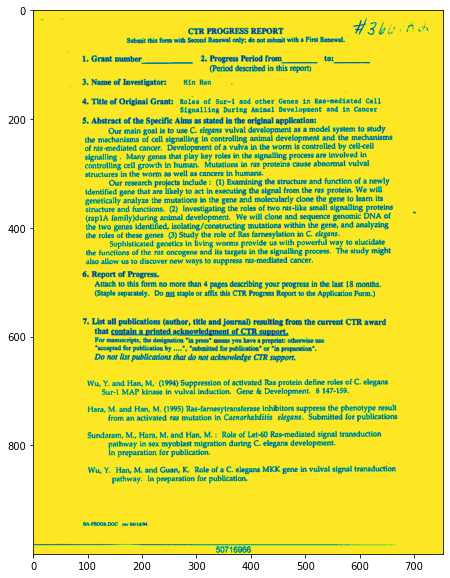



 /kaggle/input/the-rvlcdip-dataset-test/test/resume/50268346-8356.tif 



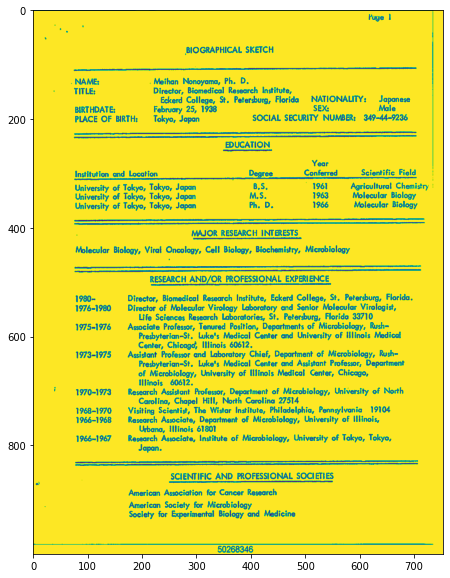



 /kaggle/input/the-rvlcdip-dataset-test/test/memo/1004865643.tif 



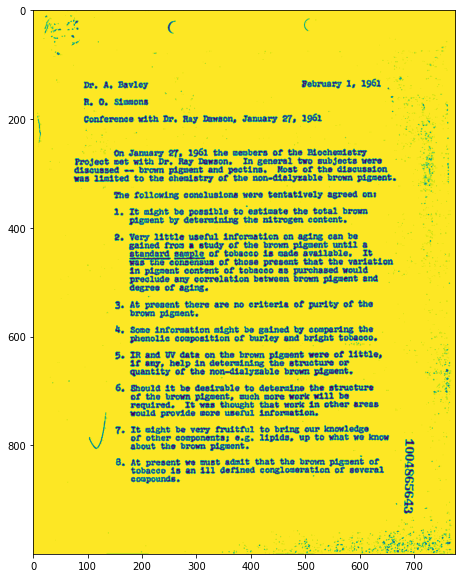



 /kaggle/input/the-rvlcdip-dataset-test/test/file_folder/2063576849.tif 



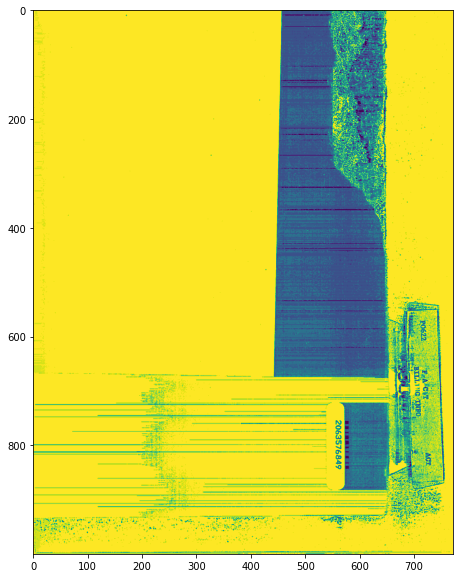



 /kaggle/input/the-rvlcdip-dataset-test/test/specification/2023632808.tif 



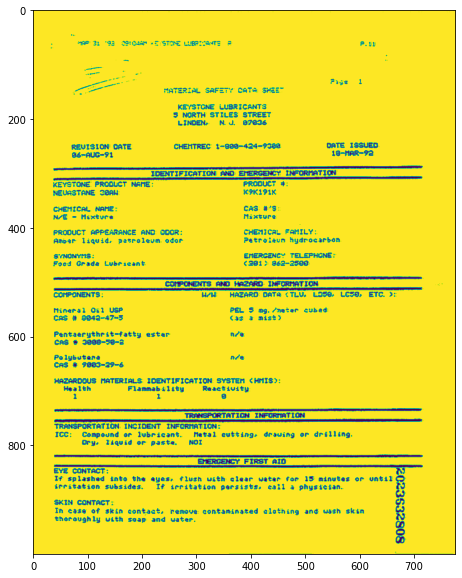



 /kaggle/input/the-rvlcdip-dataset-test/test/news_article/1003537739-b.tif 



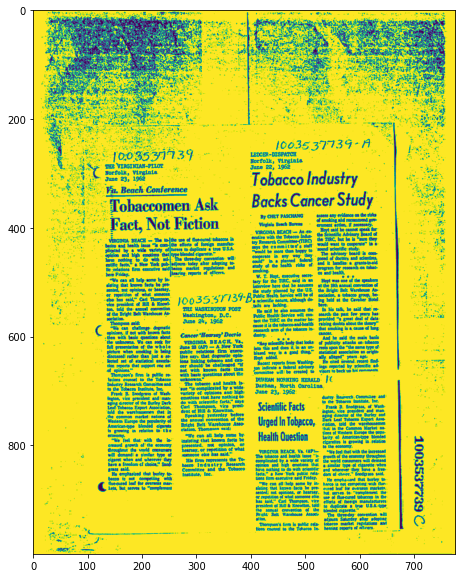



 /kaggle/input/the-rvlcdip-dataset-test/test/letter/0060161192.tif 



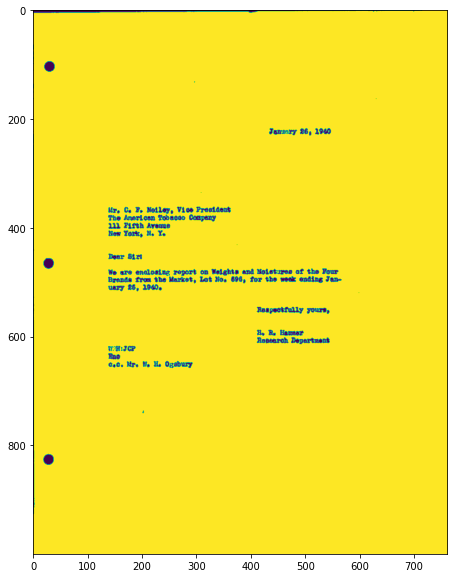



 /kaggle/input/the-rvlcdip-dataset-test/test/form/2043043029.tif 



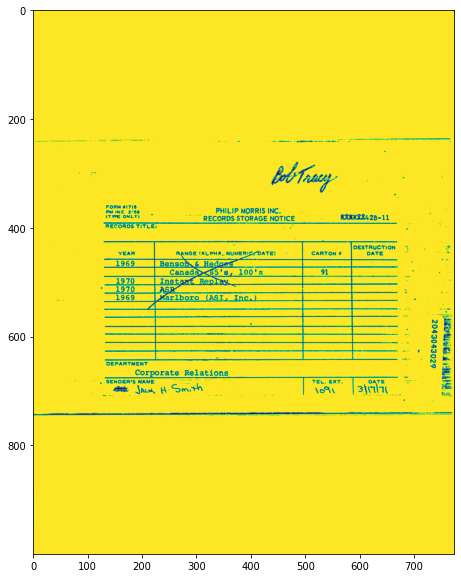



 /kaggle/input/the-rvlcdip-dataset-test/test/budget/2063162037_2038.tif 



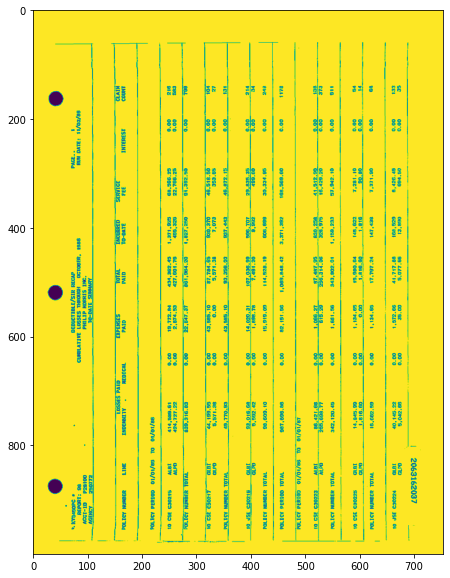



 /kaggle/input/the-rvlcdip-dataset-test/test/handwritten/503552571+-2573.tif 



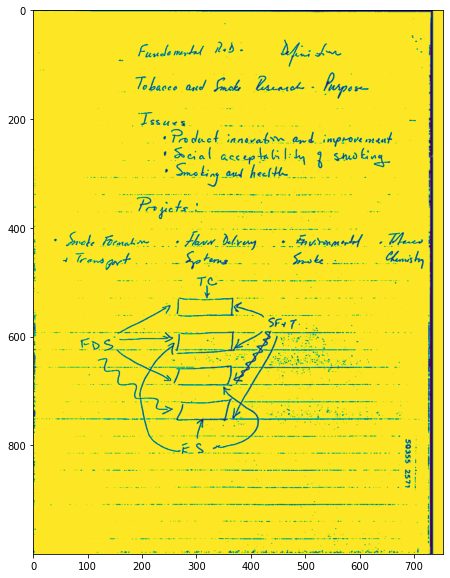



 /kaggle/input/the-rvlcdip-dataset-test/test/email/2081183829c_3830.tif 



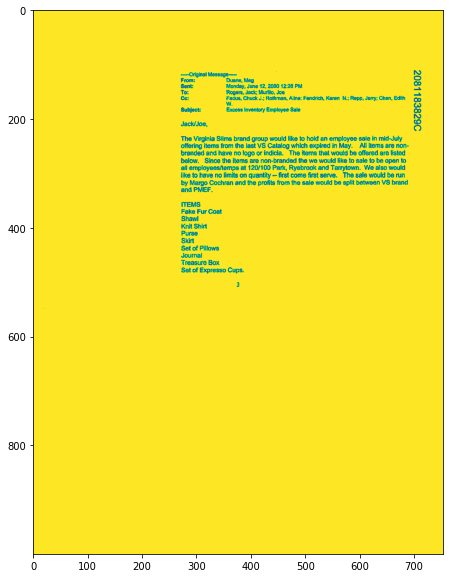



 /kaggle/input/the-rvlcdip-dataset-test/test/invoice/518254491+-4510.tif 



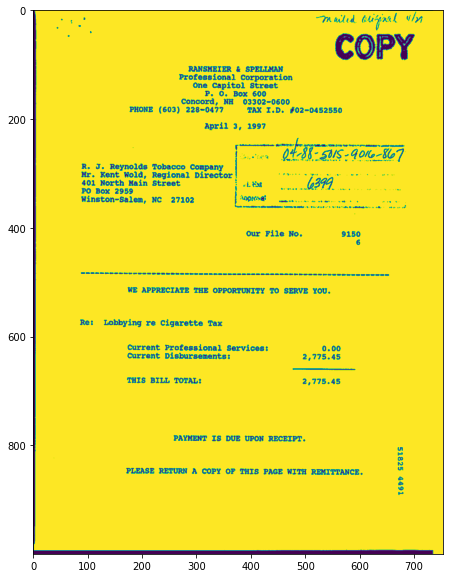



 /kaggle/input/the-rvlcdip-dataset-test/test/presentation/2085581715_1723.tif 



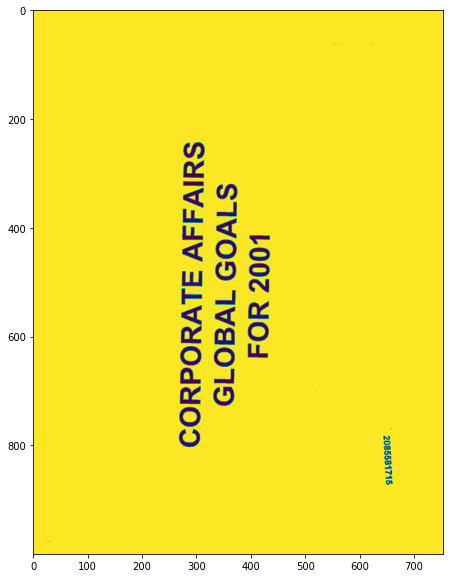



 /kaggle/input/the-rvlcdip-dataset-test/test/scientific_publication/50582177-2177.tif 



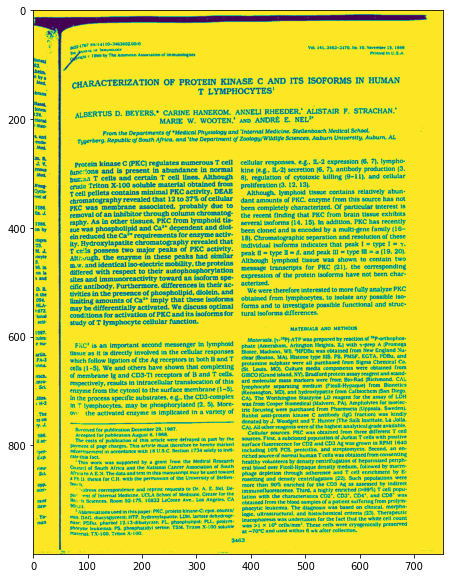



 /kaggle/input/the-rvlcdip-dataset-test/test/questionnaire/506389276.tif 



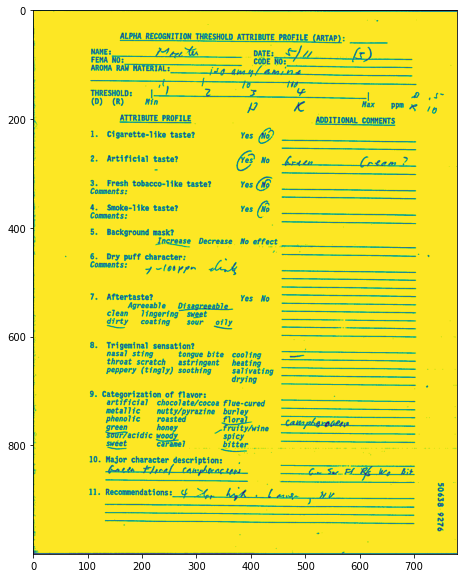



 /kaggle/input/the-rvlcdip-dataset-test/test/advertisement/507196809+-6812.tif 



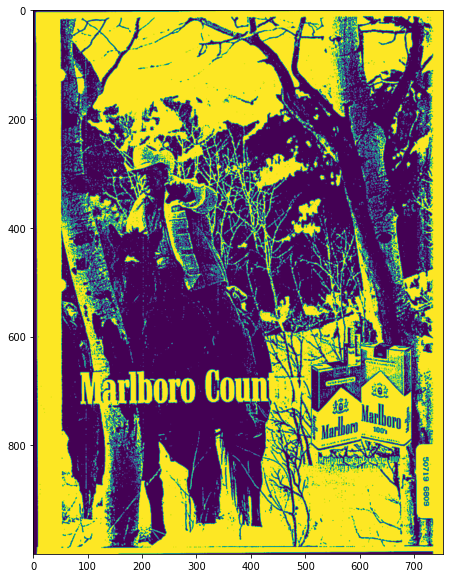

In [4]:
import matplotlib.pyplot as plt 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for d in _: 
        for filename in os.listdir(os.path.join(dirname,d)):
            if filename.endswith('tif'):
                print('\n\n',os.path.join(dirname,d,filename),'\n')
                image = plt.imread(os.path.join(dirname,d,filename))
                plt.figure(figsize=(10,10))
                plt.imshow(image)
                plt.show()
                break 

In [5]:
print('Types of documents: ',len(os.listdir('/kaggle/input/the-rvlcdip-dataset-test/test/')))
print(os.listdir('/kaggle/input/the-rvlcdip-dataset-test/test/'))

Types of documents:  16
['scientific_report', 'resume', 'memo', 'file_folder', 'specification', 'news_article', 'letter', 'form', 'budget', 'handwritten', 'email', 'invoice', 'presentation', 'scientific_publication', 'questionnaire', 'advertisement']


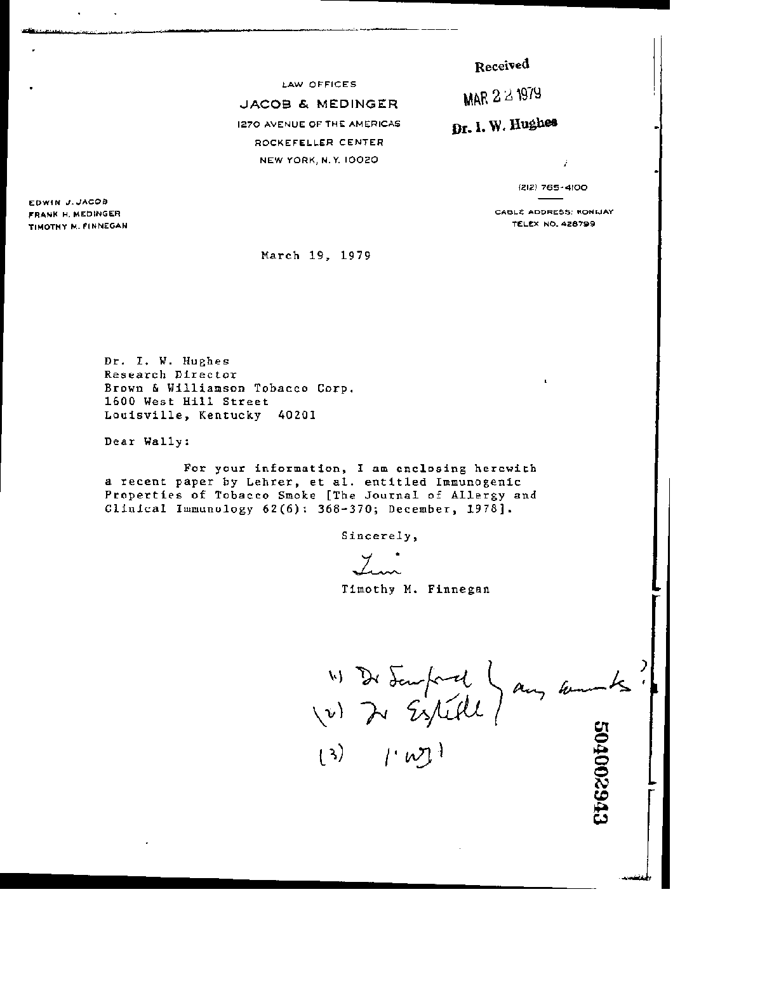

In [42]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("/kaggle/input/the-rvlcdip-dataset-test/test/letter/0000000700.tif")
image = image.convert("RGB")
image

In [57]:
import pytesseract
import numpy as np

ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
ocr_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,762,1000,-1,NaN
1,2,1,1,0,0,0,22,0,648,56,-1,NaN
2,3,1,1,1,0,0,22,0,648,56,-1,NaN
3,4,1,1,1,1,0,22,0,648,56,-1,NaN
4,5,1,1,1,1,1,22,0,648,56,95,
...,...,...,...,...,...,...,...,...,...,...,...,...
162,5,1,16,1,1,1,609,590,55,295,95,
163,2,1,17,0,0,0,0,873,592,16,-1,NaN
164,3,1,17,1,0,0,0,873,592,16,-1,NaN
165,4,1,17,1,1,0,0,873,592,16,-1,NaN


In [58]:
ocr_df = ocr_df.dropna().reset_index(drop=True)
ocr_df


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,5,1,1,1,1,1,22,0,648,56,95,
1,5,1,2,1,1,1,475,58,54,14,96,Received
2,5,1,2,1,2,1,464,91,24,15,54,Mar
3,5,1,2,1,2,2,493,89,18,13,69,22
4,5,1,2,1,2,3,517,87,24,14,69,1973
...,...,...,...,...,...,...,...,...,...,...,...,...
94,5,1,14,1,1,1,326,748,11,18,55,Ww
95,5,1,14,1,1,2,385,742,58,26,49,pw?
96,5,1,15,1,1,1,594,721,15,104,17,epezoobos
97,5,1,16,1,1,1,609,590,55,295,95,


In [60]:
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])
words

'Received Mar 22 1973 1270 AVENUE OF THE AMERICAS pr. 1. W. Hughes 4 Law OFFICES. YACOB & MEDINGER ROCKEFELLER CENTER NEW YORK, N.Y. 10020 Maren 18, 1979 Dr. T. W. Hughes Research Director . Brown & Willianson Tobacco Corp 1600 West Hill Street Lovisvilie, Kentucky 40201 Dear Wally: For your information, I am enclosing herewith a recent paper by Lehrer, et ei. entitled Immunogenic Properties of Tobacco Smoke [The Journal of Allergy and Clinical Tununvlogy 62(6): 368-370; December, 1978]. Sincerely, La Timothy M. Finnegai WO ke Ay bom WD tle Ww pw? epezoobos'

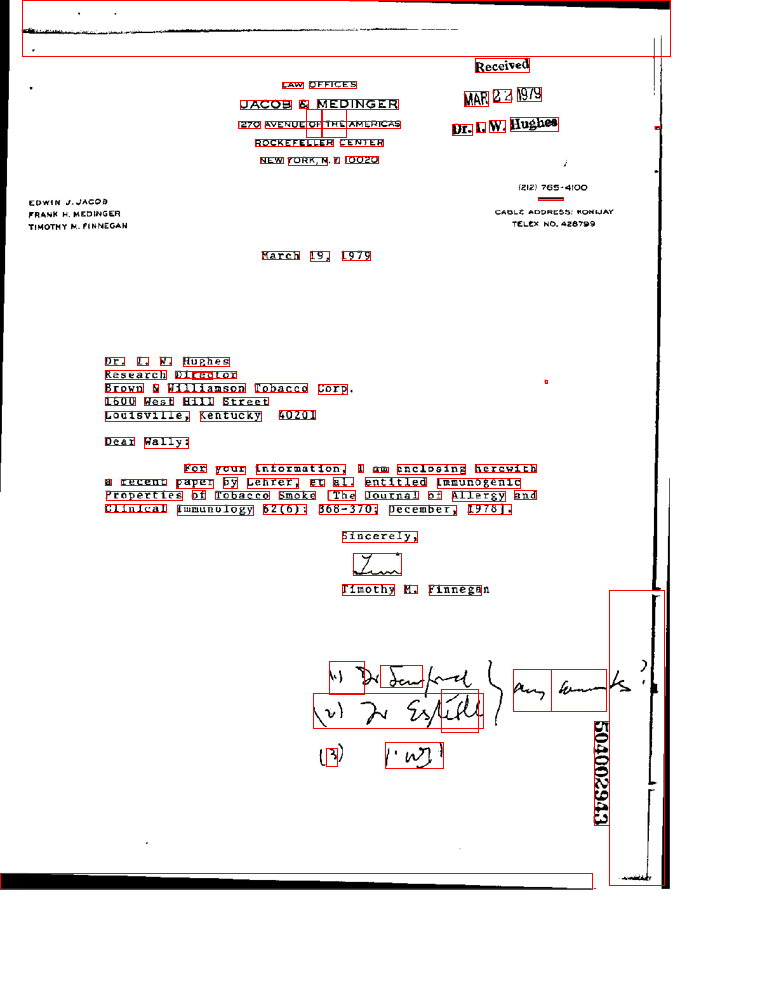

In [61]:
coordinates = ocr_df[['left', 'top', 'width', 'height']]
actual_boxes = []
for idx, row in coordinates.iterrows():
    x, y, w, h = tuple(row) 
    actual_box = [x, y, x+w, y+h] 
    actual_boxes.append(actual_box)

draw = ImageDraw.Draw(image, "RGB")
for box in actual_boxes:
  draw.rectangle(box, outline='red')

image

In [62]:
dataset_path = "/kaggle/input/the-rvlcdip-dataset-test/test"
labels = [label for label in os.listdir(dataset_path)]
idx2label = {v: k for v, k in enumerate(labels)}
label2idx = {k: v for v, k in enumerate(labels)}
label2idx

{'scientific_report': 0,
 'resume': 1,
 'memo': 2,
 'file_folder': 3,
 'specification': 4,
 'news_article': 5,
 'letter': 6,
 'form': 7,
 'budget': 8,
 'handwritten': 9,
 'email': 10,
 'invoice': 11,
 'presentation': 12,
 'scientific_publication': 13,
 'questionnaire': 14,
 'advertisement': 15}

In [63]:
data=pd.DataFrame()
i=0
for label in os.listdir(dataset_path):
    count=0
    for filename in os.listdir(dataset_path+'/'+label):

        if '.ipynb' not in filename and count<50:
            data.at[i,'image_path']=dataset_path+'/'+label+'/'+filename
            data.at[i,'label']=label
            i=i+1
            count=count+1


data = shuffle(data)

In [64]:
data.head()

,image_path,label
144,/kaggle/input/the-rvlcdip-dataset-test/test/me...,memo
614,/kaggle/input/the-rvlcdip-dataset-test/test/pr...,presentation
335,/kaggle/input/the-rvlcdip-dataset-test/test/le...,letter
253,/kaggle/input/the-rvlcdip-dataset-test/test/ne...,news_article
685,/kaggle/input/the-rvlcdip-dataset-test/test/sc...,scientific_publication


In [65]:
len(data)

800

In [66]:
data.columns

Index(['image_path', 'label'], dtype='object')

In [67]:
X=data[['image_path']]
y=data[['label']]

In [68]:
X

,image_path
144,/kaggle/input/the-rvlcdip-dataset-test/test/me...
614,/kaggle/input/the-rvlcdip-dataset-test/test/pr...
335,/kaggle/input/the-rvlcdip-dataset-test/test/le...
253,/kaggle/input/the-rvlcdip-dataset-test/test/ne...
685,/kaggle/input/the-rvlcdip-dataset-test/test/sc...
...,...
142,/kaggle/input/the-rvlcdip-dataset-test/test/me...
535,/kaggle/input/the-rvlcdip-dataset-test/test/em...
339,/kaggle/input/the-rvlcdip-dataset-test/test/le...
18,/kaggle/input/the-rvlcdip-dataset-test/test/sc...


In [96]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

X_valid,X_test,y_valid,y_test=train_test_split(X_val, y_val, test_size=0.2, stratify=y_val)

In [97]:
X_train

,image_path
401,/kaggle/input/the-rvlcdip-dataset-test/test/bu...
86,/kaggle/input/the-rvlcdip-dataset-test/test/re...
439,/kaggle/input/the-rvlcdip-dataset-test/test/bu...
16,/kaggle/input/the-rvlcdip-dataset-test/test/sc...
583,/kaggle/input/the-rvlcdip-dataset-test/test/in...
...,...
621,/kaggle/input/the-rvlcdip-dataset-test/test/pr...
597,/kaggle/input/the-rvlcdip-dataset-test/test/in...
64,/kaggle/input/the-rvlcdip-dataset-test/test/re...
388,/kaggle/input/the-rvlcdip-dataset-test/test/fo...


In [98]:
train_data=pd.concat([X_train, y_train], axis=1)
valid_data=pd.concat([X_valid, y_valid], axis=1)
test_data=pd.concat([X_test, y_test], axis=1)

In [99]:
train_size=len(train_data)
validation_size=len(valid_data)
test_size=len(test_data)

print(len(train_data))
print(len(valid_data))
print(len(test_data))

640
128
32


In [85]:
from datasets import Dataset

def normalize_box(box, width, height):
     return [
         int(1000 * (box[0] / width)),
         int(1000 * (box[1] / height)),
         int(1000 * (box[2] / width)),
         int(1000 * (box[3] / height)),
     ]

def apply_ocr(example):
        # get the image
        image = Image.open(example['image_path'])

        width, height = image.size
        
        # apply ocr to the image 
        ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
        float_cols = ocr_df.select_dtypes('float').columns
        ocr_df = ocr_df.dropna().reset_index(drop=True)
        ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
        ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
        ocr_df = ocr_df.dropna().reset_index(drop=True)

        # get the words and actual (unnormalized) bounding boxes
        #words = [word for word in ocr_df.text if str(word) != 'nan'])
        words = list(ocr_df.text)
        words = [str(w) for w in words]
        coordinates = ocr_df[['left', 'top', 'width', 'height']]
        actual_boxes = []
        for idx, row in coordinates.iterrows():
            x, y, w, h = tuple(row) 
            actual_box = [x, y, x+w, y+h]  
            actual_boxes.append(actual_box)
        
        # normalize the bounding boxes
        boxes = []
        for box in actual_boxes:
            boxes.append(normalize_box(box, width, height))
        
        example['words'] = words
        example['bbox'] = boxes
        return example


In [86]:
train_dataset = Dataset.from_pandas(train_data)
train_dataset

Dataset({
    features: ['image_path', 'label', '__index_level_0__'],
    num_rows: 640
})

In [87]:
train_dataset[0]

{'image_path': '/kaggle/input/the-rvlcdip-dataset-test/test/email/528016823+-6823.tif',
 'label': 'email',
 '__index_level_0__': 538}

In [102]:
train_dataset = Dataset.from_pandas(train_data)
updated_train_dataset = train_dataset.map(apply_ocr)

valid_dataset = Dataset.from_pandas(valid_data)
updated_valid_dataset = valid_dataset.map(apply_ocr)

test_dataset = Dataset.from_pandas(test_data)
updated_test_dataset = test_dataset.map(apply_ocr)


updated_train_dataset=updated_train_dataset.remove_columns('__index_level_0__')
updated_valid_dataset=updated_valid_dataset.remove_columns('__index_level_0__')
updated_test_dataset=updated_test_dataset.remove_columns('__index_level_0__')

0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

In [103]:
updated_train_dataset[1]

{'image_path': '/kaggle/input/the-rvlcdip-dataset-test/test/resume/50485574-5575.tif',
 'label': 'resume',
 'words': ['FF',
  'PancpalinvesigateBrogram',
  'Director',
  '(Las',
  'fst,',
  'mol)',
  '_Mims,',
  'Martha',
  'P.',
  'BIOGRAPHICAL',
  'SKETCH',
  'Gee',
  'oowngtomaton',
  'ry',
  'serene',
  'an',
  'constant',
  'ar',
  'nae',
  'cn',
  'cota.',
  'Boge',
  'wine',
  'pops!',
  'investigstor’program',
  'director.',
  'Photocopy',
  'this',
  'page',
  'for',
  'each',
  '~—,',
  'mec',
  'NAME',
  '|',
  'POSITION',
  'TITLE',
  'Chao-yuh',
  'Yang,',
  'Ph.D.',
  '|',
  'Research',
  'Professor',
  'EDUCATION',
  '(Bogin',
  'wi',
  'bacalsrene',
  'other',
  'eal',
  'protest’',
  'edscabon.',
  'Such',
  '35',
  'Fare.',
  'Re',
  'panGCTa',
  'Tang)',
  '|',
  'r',
  'INSTITUTION',
  'AND',
  'LOCATION',
  '|_vecres',
  '|',
  'constnes',
  '|',
  'petoorstuov',
  '‘Tamkang',
  'College',
  'of',
  'Arts',
  'and',
  'Sciences',
  ';',
  'es.',
  '|',
  '1962',
  

# *2.LayoutLMForSequenceClassification*

In [104]:
from transformers import LayoutLMTokenizer
import torch
from datasets import Features, Sequence, ClassLabel, Value, Array2D

tokenizer = LayoutLMTokenizer.from_pretrained("microsoft/layoutlm-base-uncased")

def encode_example(example, max_seq_length=512, pad_token_box=[0, 0, 0, 0]):
  words = example['words']
  normalized_word_boxes = example['bbox']
    
  token_boxes = []
  for word, box in zip(words, normalized_word_boxes):
      word_tokens = tokenizer.tokenize(word)
      token_boxes.extend([box] * len(word_tokens))
  
  # Truncation of token_boxes
  special_tokens_count = 2 
  if len(token_boxes) > max_seq_length - special_tokens_count:
      token_boxes = token_boxes[: (max_seq_length - special_tokens_count)]
  
  # add bounding boxes of cls + sep tokens
  token_boxes = [[0, 0, 0, 0]] + token_boxes + [[1000, 1000, 1000, 1000]]
  
  encoding = tokenizer(' '.join(words), padding='max_length', truncation=True)
  # Padding of token_boxes up the bounding boxes to the sequence length.
  input_ids = tokenizer(' '.join(words), truncation=True)["input_ids"]
  padding_length = max_seq_length - len(input_ids)
  token_boxes += [pad_token_box] * padding_length
  encoding['bbox'] = token_boxes
  encoding['label'] = label2idx[example['label']]

  return encoding

features = Features({
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    'label': ClassLabel(names=['refuted', 'entailed']),
    'image_path': Value(dtype='string'),
    'words': Sequence(feature=Value(dtype='string')),
})


In [105]:
tokenizer('hello i am ganesh how are you',padding='max_length',truncation=True)

{'input_ids': [101, 7592, 1045, 2572, 25957, 9953, 2129, 2024, 2017, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [106]:
encoded_train_dataset = updated_train_dataset.map(lambda example: encode_example(example), 
                                      features=features)

encoded_train_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])


encoded_valid_dataset = updated_valid_dataset.map(lambda example: encode_example(example), 
                                      features=features)

encoded_valid_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])

encoded_test_dataset = updated_test_dataset.map(lambda example: encode_example(example), 
                                      features=features)

encoded_test_dataset.set_format(type='torch', columns=['input_ids', 'bbox', 'attention_mask', 'token_type_ids', 'label'])

0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

In [107]:
train_dataloader = torch.utils.data.DataLoader(encoded_train_dataset, batch_size=5, shuffle=True)
validation_dataloader = torch.utils.data.DataLoader(encoded_valid_dataset, batch_size=2, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(encoded_test_dataset, batch_size=1, shuffle=True)

In [108]:
from transformers import LayoutLMForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LayoutLMForSequenceClassification.from_pretrained("microsoft/layoutlm-base-uncased", num_labels=len(label2idx))
model.to(device)

Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing LayoutLMForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LayoutLMForSequenceClassification were not initialized from the model checkpoint 

LayoutLMForSequenceClassification(
  (layoutlm): LayoutLMModel(
    (embeddings): LayoutLMEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (x_position_embeddings): Embedding(1024, 768)
      (y_position_embeddings): Embedding(1024, 768)
      (h_position_embeddings): Embedding(1024, 768)
      (w_position_embeddings): Embedding(1024, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): LayoutLMEncoder(
      (layer): ModuleList(
        (0): LayoutLMLayer(
          (attention): LayoutLMAttention(
            (self): LayoutLMSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
      

In [109]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

global_step = 0
num_train_epochs = 10
t_total = len(train_dataloader) * num_train_epochs # total number of training steps 


for epoch in range(num_train_epochs):
  print("Epoch:", epoch)
  running_loss = 0.0
  correct = 0
  model.train()
  for batch in train_dataloader:
      input_ids = batch["input_ids"].to(device)
      bbox = batch["bbox"].to(device)
      attention_mask = batch["attention_mask"].to(device)
      token_type_ids = batch["token_type_ids"].to(device)
      labels = batch["label"].to(device)

      # forward pass
      outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids,
                      labels=labels)
      loss = outputs.loss

      running_loss += loss.item()
      predictions = outputs.logits.argmax(-1)
      correct += (predictions == labels).float().sum()

      # backward pass to get the gradients 
      loss.backward()

      # update
      optimizer.step()
      optimizer.zero_grad()
      global_step += 1
  
  print("Loss:", running_loss / batch["input_ids"].shape[0])
  accuracy = 100 * correct / train_size
  print("Training accuracy:", accuracy.item())
    
  if epoch%5==0:
    model.eval()

    correct = 0
    for batch in validation_dataloader:
        input_ids = batch["input_ids"].to(device)
        bbox = batch["bbox"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        labels = batch["label"].to(device)
        outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids)
        predictions = outputs.logits.argmax(-1)
        correct += (predictions == labels).float().sum()

    accuracy = 100 * correct / validation_size
    print("Validation accuracy:", accuracy.item())

Epoch: 0
Loss: 61.70742678642273
Training accuracy: 27.65625
Validation accuracy: 44.53125
Epoch: 1
Loss: 38.15239723920822
Training accuracy: 58.125
Epoch: 2
Loss: 23.99459100961685
Training accuracy: 74.84375
Epoch: 3
Loss: 13.594086346030235
Training accuracy: 86.09375
Epoch: 4
Loss: 8.680811493098735
Training accuracy: 92.5
Epoch: 5
Loss: 6.803154343366623
Training accuracy: 93.4375
Validation accuracy: 71.09375
Epoch: 6
Loss: 4.595013454928994
Training accuracy: 96.09375
Epoch: 7
Loss: 2.6782825395464895
Training accuracy: 97.5
Epoch: 8
Loss: 2.5178303118795156
Training accuracy: 97.34375
Epoch: 9
Loss: 3.4446124441921713
Training accuracy: 96.40625


In [ ]:
#save the model_state_dict 
torch.save(model.state_dict(),'model_state_dict.pt')

#load the model
#model.load_state_dict(torch.load('model.pt'))

In [110]:
model.eval()
labels_output=[]
predictions_output=[]


correct = 0
for batch in test_dataloader:
    input_ids = batch["input_ids"].to(device)
    bbox = batch["bbox"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    token_type_ids = batch["token_type_ids"].to(device)
    labels = batch["label"].to(device)
    outputs = model(input_ids=input_ids, bbox=bbox, attention_mask=attention_mask, token_type_ids=token_type_ids)
    predictions = outputs.logits.argmax(-1)
#     print(labels)
#     print(predictions)
    correct += (predictions == labels).float().sum()
#     print(correct)

accuracy = 100 * correct / test_size
print("Testing accuracy:", accuracy.item())

Testing accuracy: 78.125


**Due to time-limitation and limited resources available,I uesd very small dataset consisting of 50 docs images for each of 16 category.Whereas the RVL-CDIP dataset contains 2500 images for each category.**

# *3.Text Summarization using NLTK- Extract-based* 

In [122]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize,sent_tokenize

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [123]:
stop_words = stopwords.words('english')
stop_punct_words = stop_words + list(punctuation + '\n')

In [124]:
#extract-based-summarization

from heapq import nlargest
from collections import defaultdict

def text_summ(word_tokens):
    '''
    word_tokens : tokens obtained from ocr
    '''
    sentences = ' '.join(word_tokens)
    #frequency table
    freq = {}
    tokens = word_tokenize(sentences)
    for word in tokens:
        if word.lower() not in stop_punct_words:
            if not freq.get(word.lower(),False):
                freq[word.lower()] = 1
            else:
                freq[word.lower()] +=1
    max_value = max(freq.values())
    for word in freq.keys():
        freq[word] = freq[word]/max_value
        
    #weighted importance of sentences
    sentence_weight = defaultdict()
    count2sent = {}
    count = 0
    for sentence in sent_tokenize(sentences):
        for word in freq.keys():
            if word in sentence.lower():
                if not sentence_weight.get(sentence,False) :
                    sentence_weight[count] = freq[word]
                    count2sent[count] = sentence
                else:
                    sentence_weight[count] += freq[word]
        count += 1            
    
    #selecting nlargest sentences as summary
    select_len = int(len(sentence_weight)*0.3)
    
    ids = nlargest(select_len,sentence_weight,sentence_weight.get)
    summary = [count2sent[i] for i in ids ]
    
    return summary

print('Text before summarization:\n')
print(' '.join(updated_train_dataset[4]['words']))
print('\nText after Extract-based Summarization :\n')
print(text_summ(updated_train_dataset[4]['words']))


Text before summarization:

| gurcons MAIL GISTER CRC CONTRACT RESEARCH CENTER wveaisent Geacressanice Aviencs Fabriques iv Tabac Réunies S.A. Finance Department Quai Jeanrenaud 3 Case Postale CH-2003 Neuchatel Switzerland 8-192 Zaventem {Gint-Stevens-Woluwe) Tollaan / Avenue du Péage 1016 Teleloon / Telephone: 02/720.81.74 Tolotax / Telotax: 02/725.12.09 JGB/MCM taventem, 30 Jun.91 PROJECT «RUNNING TITLE CHARGES No (BEC) B1019 iological Activity of A 245 88,800 B1021 biological Activity of FRSS and ELSS 5,883,000 86023 Biological Activity of New Smoke 133,200 87002 Scientific and Technical Improvements 281,200 87003 Project Management 950,000, votal: 7,336 , 200 Please rewit the amount within 10 days to the below mentioned bank teount at the Generale Bank, Brussels, Belgium. excemption of VAT according to § 3 article 21, 7 law. cc: Mx. Eberhard, INBIFO, Cologne of the VAT code of

Text after Extract-based Summarization :

['| gurcons MAIL GISTER CRC CONTRACT RESEARCH CENTER wveaisent 

# *4.Extracting Keywords from docs using TFIDF*

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [115]:
updated_train_dataset.features

{'image_path': Value(dtype='string', id=None),
 'label': Value(dtype='string', id=None),
 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bbox': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None)}

In [116]:
docs = {}
for data in updated_train_dataset:
    if not docs.get(data['label'],False):
        docs[data['label']] = [' '.join(data['words'])]
    else:
        docs[data['label']].append(' '.join(data['words']))

In [117]:
def get_tfidfvec(docs):
    tfidf = TfidfVectorizer(max_df=0.85,min_df=1,stop_words='english',use_idf=True,max_features=100)
    vectorizer = tfidf.fit(docs)
    return tfidf


vectorizers = {}
for label in docs.keys():
    vectorizers[label] = get_tfidfvec(docs[label])

In [118]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [119]:
def get_nkeywords(text,label,n=10):
    tfidf_sco = vectorizers[label].transform([text])
    tfidf_sco = tfidf_sco.tocoo()
    sort_sco = sort_coo(tfidf_sco)
    feature_names = {val:key for (key,val) in vectorizers[label].vocabulary_.items()}
    topn = extract_topn_from_vector(feature_names, sort_sco, topn=n)
    return topn



In [120]:
import pickle
#saving the vectorizers
pickle.dump(vectorizers,open(f'vectorizer.pickle','wb'))
#load vectorizers
#vectorizers = pickle.load(open('vectorizer.pickle','rb'))

In [127]:
#try on test data

text = ' '.join(updated_test_dataset[10]['words'])
print(get_nkeywords(text,updated_test_dataset[10]['label'],10))

{'taste': 0.6, 'yes': 0.431, 'like': 0.399, '10': 0.3, 'aroma': 0.216, 'os': 0.174, 'dry': 0.174, 'aftertaste': 0.165, 'flavor': 0.157, 'tobacco': 0.128}
